In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from IPython.display import Image, clear_output

In [2]:
data = tf.keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = data.load_data()
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

clear_output()
print("X_train_full shape :",X_train_full.shape)
print("X_test shape :", X_test.shape)

X_train_full shape : (60000, 28, 28)
X_test shape : (10000, 28, 28)


In [3]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [4]:
# Always do normalize
X_valid, X_train = X_valid/255., X_train/255.

# Specify the model's architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    
])

# Specify the loss fuction, optimizer, metrics
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

# Train the model
history = model.fit(
    X_train, y_train, epochs=10,
    validation_data = (X_valid, y_valid),
    verbose=0
)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


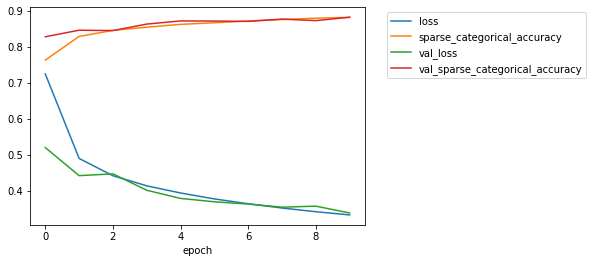

In [6]:
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [7]:
loss, acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 949us/step - loss: 71.3751 - sparse_categorical_accuracy: 0.8245
